In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats

In [2]:
stocks_df = pd.read_csv('stock.csv')
stocks_df

,Unnamed: 0,Date,TSLA,WL-MART,AMZN,MSFOT,VISA,AAPL,GOOGL,NTFLX,JP-MORGN,NVDA
0,0,07-08-2017,71.470001,80.570000,49.532501,72.800003,100.919998,39.264999,46.452999,181.000000,93.889999,42.097500
1,1,08-08-2017,71.505997,81.169998,49.717499,72.089996,101.500000,39.650002,46.354500,181.369995,93.949997,43.472500
2,2,09-08-2017,72.199997,81.110001,49.130001,72.250000,100.760002,39.814999,46.030499,171.429993,92.980003,42.107498
3,3,10-08-2017,72.320000,81.070000,48.814999,71.900002,100.540001,39.974998,45.877499,174.029999,92.900002,43.040001
4,4,11-08-2017,71.393997,80.730003,48.000000,71.610001,99.550003,39.150002,45.398499,169.860001,92.129997,39.285000
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,29-07-2022,842.099976,128.320007,134.899994,277.700012,212.000000,161.240005,113.400002,223.289993,115.589996,178.130005
1254,1254,01-08-2022,903.830017,131.059998,134.960007,277.820007,208.449997,161.009995,115.529999,223.100006,114.500000,181.820007
1255,1255,02-08-2022,882.010010,133.149994,134.720001,276.000000,207.800003,160.100006,114.430000,222.759995,113.919998,181.220001
1256,1256,03-08-2022,915.000000,132.160004,136.210007,276.760010,207.990005,160.839996,116.339996,224.789993,113.449997,181.839996


In [5]:
stocks_df = stocks_df.drop(columns="Unnamed: 0") 

In [6]:
stocks_df

,Date,TSLA,WL-MART,AMZN,MSFOT,VISA,AAPL,GOOGL,NTFLX,JP-MORGN,NVDA
0,07-08-2017,71.470001,80.570000,49.532501,72.800003,100.919998,39.264999,46.452999,181.000000,93.889999,42.097500
1,08-08-2017,71.505997,81.169998,49.717499,72.089996,101.500000,39.650002,46.354500,181.369995,93.949997,43.472500
2,09-08-2017,72.199997,81.110001,49.130001,72.250000,100.760002,39.814999,46.030499,171.429993,92.980003,42.107498
3,10-08-2017,72.320000,81.070000,48.814999,71.900002,100.540001,39.974998,45.877499,174.029999,92.900002,43.040001
4,11-08-2017,71.393997,80.730003,48.000000,71.610001,99.550003,39.150002,45.398499,169.860001,92.129997,39.285000
...,...,...,...,...,...,...,...,...,...,...,...
1253,29-07-2022,842.099976,128.320007,134.899994,277.700012,212.000000,161.240005,113.400002,223.289993,115.589996,178.130005
1254,01-08-2022,903.830017,131.059998,134.960007,277.820007,208.449997,161.009995,115.529999,223.100006,114.500000,181.820007
1255,02-08-2022,882.010010,133.149994,134.720001,276.000000,207.800003,160.100006,114.430000,222.759995,113.919998,181.220001
1256,03-08-2022,915.000000,132.160004,136.210007,276.760010,207.990005,160.839996,116.339996,224.789993,113.449997,181.839996


In [7]:
def normalize(df):
    x = df.copy()
    
    
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [8]:
def show_plot(df, fig_title):
    df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
    plt.grid()
    plt.show()

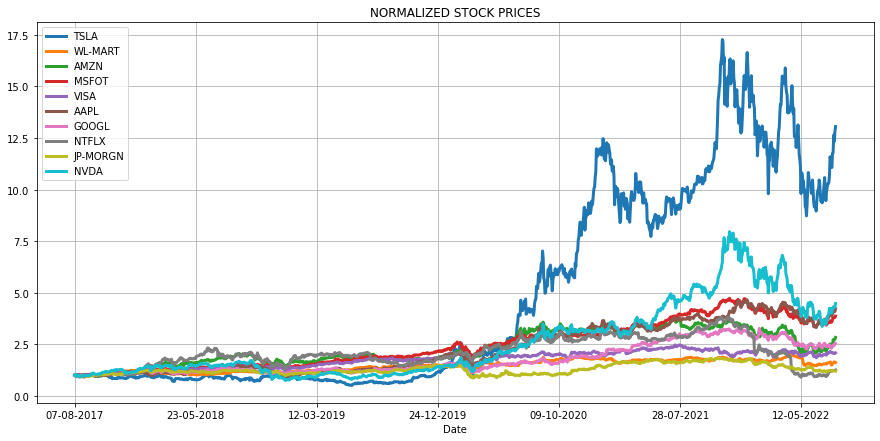

In [9]:
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [10]:
def daily_return(df):
    df_daily_return = df.copy()
    # Loop through each stock (while ignoring time columns with index 0)
    for i in df.columns[1:]:
        # Loop through each day of a stock
        for j in range(1, len(df)):
            # Calculate the percentage of change from the previous day
            df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
            
        # set the value of first row to zero since the previous value is not available
        df_daily_return[i][0] = 0
        
    return df_daily_return

In [11]:
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,TSLA,WL-MART,AMZN,MSFOT,VISA,AAPL,GOOGL,NTFLX,JP-MORGN,NVDA
0,07-08-2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,08-08-2017,0.050365,0.744692,0.373488,-0.975284,0.574715,0.980525,-0.212040,0.204417,0.063902,3.266227
2,09-08-2017,0.970548,-0.073915,-1.181672,0.221950,-0.729062,0.416134,-0.698963,-5.480511,-1.032458,-3.139921
3,10-08-2017,0.166209,-0.049317,-0.641160,-0.484426,-0.218342,0.401856,-0.332388,1.516658,-0.086041,2.214577
4,11-08-2017,-1.280425,-0.419387,-1.669567,-0.403339,-0.984681,-2.063780,-1.044085,-2.396137,-0.828854,-8.724444
...,...,...,...,...,...,...,...,...,...,...,...
1253,29-07-2022,0.226132,1.623513,10.964871,2.947178,0.645652,2.713727,0.531914,-0.583265,0.295007,-0.901249
1254,01-08-2022,7.330488,2.135280,0.044487,0.043210,-1.674530,-0.142651,1.878304,-0.085085,-0.942985,2.071522
1255,02-08-2022,-2.414172,1.594686,-0.177835,-0.655103,-0.311823,-0.565175,-0.952133,-0.152403,-0.506552,-0.330000
1256,03-08-2022,3.740319,-0.743515,1.106002,0.275366,0.091435,0.462205,1.669139,0.911294,-0.412571,0.342123


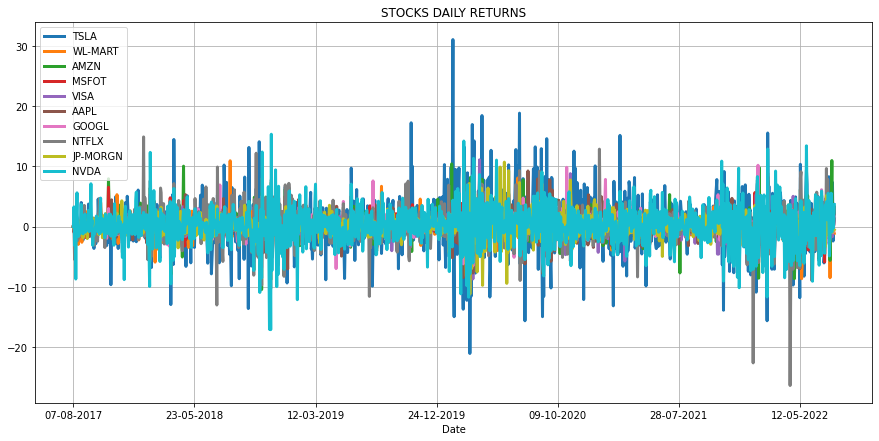

In [12]:
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

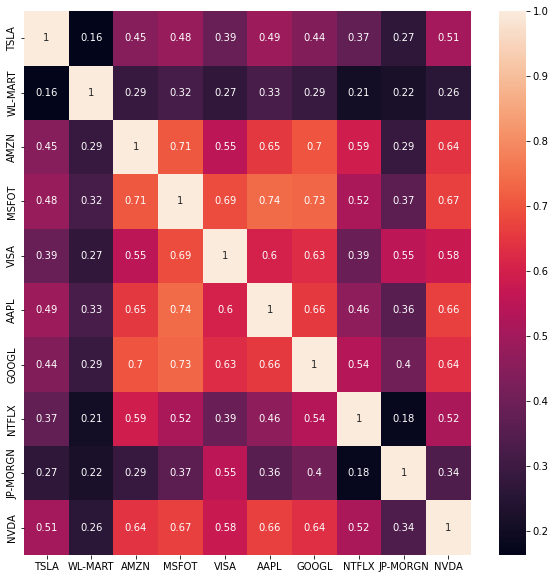

In [13]:
cm = stocks_daily_return.drop(columns = ['Date']).corr()
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

Walmart has small correlation in daily return with all other stocks. The reason might be that it belong to retail industry.

Microsoft and Apple has the highest correlation at 0.74. They both belong to IT industry.

/home/xiaoqi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


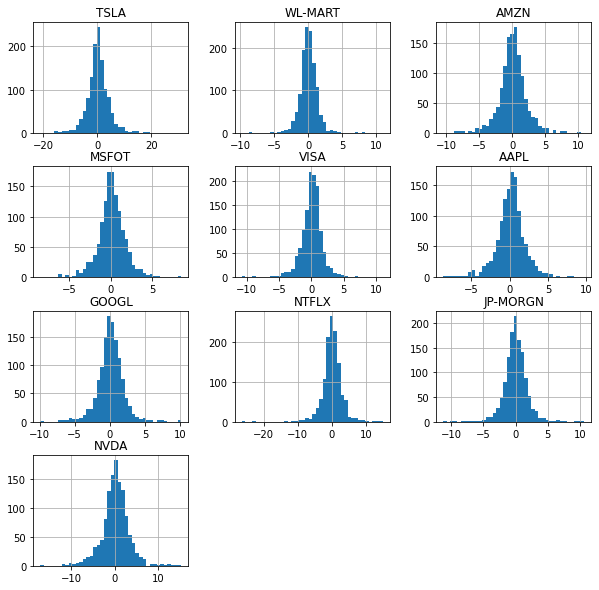

In [14]:
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

In [15]:
def portfolio_allocation(df, weights):
    df_portfolio = df.copy()
  
  # Normalize the stock avalues 
    df_portfolio = normalize(df_portfolio)
    for counter, stock in enumerate(df_portfolio.columns[1:]):
        df_portfolio[stock] = df_portfolio[stock] * weights[counter]
        df_portfolio[stock] = df_portfolio[stock] * 50000
    
    df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
    df_portfolio['portfolio daily % return'] = 0.0000
    
    for i in range(1, len(stocks_df)):
        # Calculate the percentage of change from the previous day
        df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 
    
    # set the value of first row to zero, as previous value is not available
    df_portfolio['portfolio daily % return'][0] = 0
    return df_portfolio

In [17]:
weights = np.ones(10)*0.1
simple_portfolio = portfolio_allocation(stocks_df, weights)

In [53]:
simple_portfolio

,Date,TSLA,WL-MART,AMZN,MSFOT,VISA,AAPL,GOOGL,NTFLX,JP-MORGN,NVDA,portfolio daily worth in $,portfolio daily % return
0,07-08-2017,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,50000.000000,0.000000
1,08-08-2017,5002.518259,5037.234579,5018.674405,4951.235785,5028.735732,5049.026233,4989.397993,5010.220856,5003.195122,5163.311361,50253.550326,0.507101
2,09-08-2017,5051.070099,5033.511295,4959.370111,4962.225070,4992.073127,5070.036930,4954.523926,4735.635166,4951.539248,5001.187481,49711.172453,-1.079283
3,10-08-2017,5059.465439,5031.028919,4927.572605,4938.186747,4981.173355,5090.411183,4938.055668,4807.458536,4947.278890,5111.942633,49832.573975,0.244214
4,11-08-2017,4994.682804,5009.929440,4845.303491,4918.269097,4932.124701,4985.356297,4886.498179,4692.265221,4906.273191,4665.954035,48836.656456,-1.998527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,29-07-2022,58912.828055,7963.262194,13617.321080,19072.802236,10503.369213,20532.281817,12205.885997,6168.231851,6155.607478,21156.838886,176288.428807,1.506095
1254,01-08-2022,63231.426078,8133.300112,13623.379021,19081.043651,10327.487175,20502.992372,12435.149666,6162.983591,6097.561041,21595.107429,181190.430135,2.780671
1255,02-08-2022,61704.910988,8263.000745,13599.151898,18956.043175,10295.283745,20387.114488,12316.750529,6153.591022,6066.673725,21523.843577,179266.363893,-1.061903
1256,03-08-2022,64012.871638,8201.564106,13749.558800,19008.241662,10304.697241,20481.344721,12522.334242,6209.668315,6041.644382,21597.481561,182129.406668,1.597089


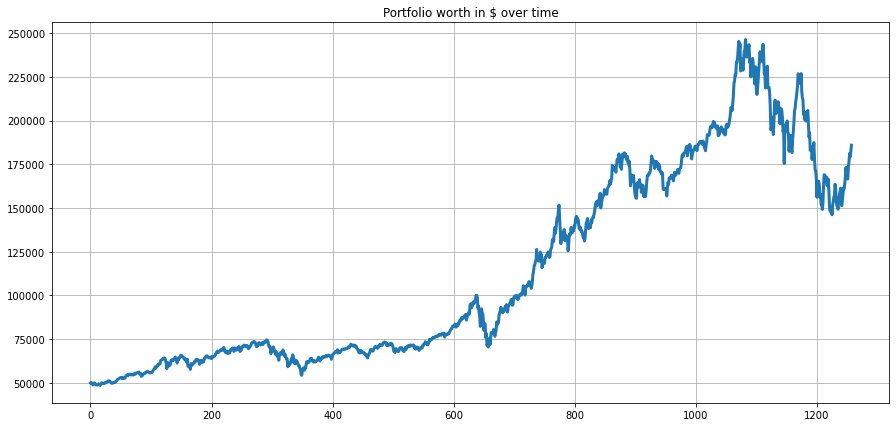

In [19]:
show_plot(simple_portfolio["portfolio daily worth in $"], 'Portfolio worth in $ over time')

<AxesSubplot:>

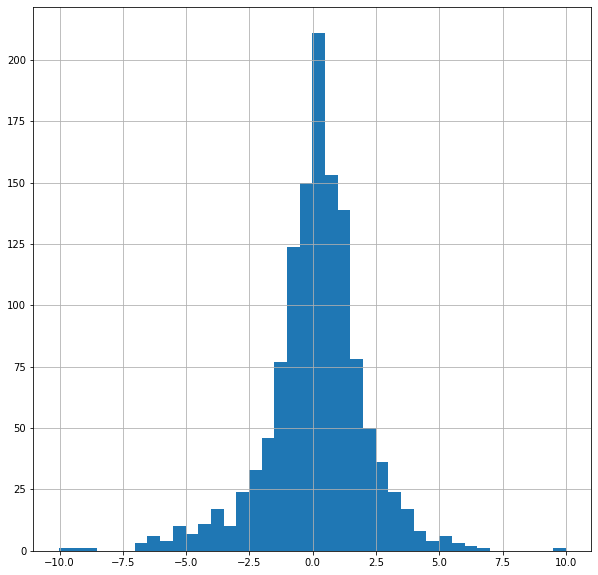

In [21]:
simple_portfolio['portfolio daily % return'].hist(figsize=(10, 10), bins = 40)

In [22]:
cummulative_return = ((simple_portfolio['portfolio daily worth in $'][-1:] - simple_portfolio['portfolio daily worth in $'][0])/ simple_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))

Cummulative return of the portfolio is 271.83271583224126 %


In [23]:
print('Standard deviation of the portfolio is {}'.format(simple_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.9275239184890398


In [24]:
print('Average daily return of the portfolio is {} %'.format(simple_portfolio['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.12314125413229166 %


In [25]:
sharpe_ratio = simple_portfolio['portfolio daily % return'].mean() / simple_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.0141543711334273


**Apply CAPM formula to calculate the return for the portfolio**  

#### The CAPM formula is represented as following: ####

 $ r_i = r_f + \beta_i (r_m -r_f) $
 
 $r_i$: expected return of a security
 
 $r_f$: risk free return of the market, here we will use 0%
 
 $r_m$: expected return of the market, here we will use S & P 500
 
 $\beta_i$: beta between the stock and the market


In [83]:
sp500 = pd.read_csv('HistoricalData_SP500.csv')

In [84]:
sp500

,Date,Close/Last,Volume,Open,High,Low
0,09/12/2022,4110.41,--,4083.67,4119.28,4083.67
1,09/09/2022,4067.36,--,4022.94,4076.81,4022.94
2,09/08/2022,4006.18,--,3959.94,4010.50,3944.81
3,09/07/2022,3979.87,--,3909.43,3987.89,3906.03
4,09/06/2022,3908.19,--,3930.89,3942.55,3886.75
...,...,...,...,...,...,...
2541,09/19/2012,1461.05,--,1459.50,1465.15,1457.88
2542,09/18/2012,1459.32,--,1457.87,1461.47,1456.13
2543,09/17/2012,1461.19,--,1465.42,1465.63,1457.55
2544,09/14/2012,1465.77,--,1460.07,1474.51,1460.07


In [85]:
from datetime import datetime
date = []
for day in sp500["Date"]:
    date.append(str(datetime.strptime(day, '%m/%d/%Y')))
    

sp500['date'] = date
sp500 = sp500.drop(columns=["Date", "High", "Low", "Volume"])

In [86]:
sp500 = sp500.sort_values(by = ['date'])
sp500

,Close/Last,Open,date
2545,1459.99,1436.56,2012-09-13 00:00:00
2544,1465.77,1460.07,2012-09-14 00:00:00
2543,1461.19,1465.42,2012-09-17 00:00:00
2542,1459.32,1457.87,2012-09-18 00:00:00
2541,1461.05,1459.50,2012-09-19 00:00:00
...,...,...,...
4,3908.19,3930.89,2022-09-06 00:00:00
3,3979.87,3909.43,2022-09-07 00:00:00
2,4006.18,3959.94,2022-09-08 00:00:00
1,4067.36,4022.94,2022-09-09 00:00:00


In [87]:
start_date = "2017-08-07"
end_date = "2022-08-05"
mask = (sp500['date'] >= start_date) & (sp500['date'] <= end_date)
sp500 = sp500.loc[mask]
sp500

,Close/Last,Open,date
1283,2480.91,2477.14,2017-08-07 00:00:00
1282,2474.92,2478.35,2017-08-08 00:00:00
1281,2474.02,2465.35,2017-08-09 00:00:00
1280,2438.21,2465.38,2017-08-10 00:00:00
1279,2441.32,2441.04,2017-08-11 00:00:00
...,...,...,...
30,4130.29,4087.33,2022-07-29 00:00:00
29,4118.63,4112.38,2022-08-01 00:00:00
28,4091.19,4104.21,2022-08-02 00:00:00
27,4155.17,4107.96,2022-08-03 00:00:00


In [90]:
stocks_daily_return['SP500'] = np.array(sp500["Open"])

In [91]:
stocks_daily_return

,Date,TSLA,WL-MART,AMZN,MSFOT,VISA,AAPL,GOOGL,NTFLX,JP-MORGN,NVDA,SP500
0,07-08-2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2477.14
1,08-08-2017,0.050365,0.744692,0.373488,-0.975284,0.574715,0.980525,-0.212040,0.204417,0.063902,3.266227,2478.35
2,09-08-2017,0.970548,-0.073915,-1.181672,0.221950,-0.729062,0.416134,-0.698963,-5.480511,-1.032458,-3.139921,2465.35
3,10-08-2017,0.166209,-0.049317,-0.641160,-0.484426,-0.218342,0.401856,-0.332388,1.516658,-0.086041,2.214577,2465.38
4,11-08-2017,-1.280425,-0.419387,-1.669567,-0.403339,-0.984681,-2.063780,-1.044085,-2.396137,-0.828854,-8.724444,2441.04
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,29-07-2022,0.226132,1.623513,10.964871,2.947178,0.645652,2.713727,0.531914,-0.583265,0.295007,-0.901249,4087.33
1254,01-08-2022,7.330488,2.135280,0.044487,0.043210,-1.674530,-0.142651,1.878304,-0.085085,-0.942985,2.071522,4112.38
1255,02-08-2022,-2.414172,1.594686,-0.177835,-0.655103,-0.311823,-0.565175,-0.952133,-0.152403,-0.506552,-0.330000,4104.21
1256,03-08-2022,3.740319,-0.743515,1.106002,0.275366,0.091435,0.462205,1.669139,0.911294,-0.412571,0.342123,4107.96


In [101]:
for i in range(1, len(sp500)):
    # Calculate the percentage of change from the previous day
    stocks_daily_return["SP500"].iloc[i] = ((sp500["Open"].iloc[i]- sp500["Open"].iloc[i-1])/sp500["Open"].iloc[i-1]) * 100
    
stocks_daily_return["SP500"][0] = 0

In [102]:
stocks_daily_return

,Date,TSLA,WL-MART,AMZN,MSFOT,VISA,AAPL,GOOGL,NTFLX,JP-MORGN,NVDA,SP500
0,07-08-2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,08-08-2017,0.050365,0.744692,0.373488,-0.975284,0.574715,0.980525,-0.212040,0.204417,0.063902,3.266227,0.048847
2,09-08-2017,0.970548,-0.073915,-1.181672,0.221950,-0.729062,0.416134,-0.698963,-5.480511,-1.032458,-3.139921,-0.524543
3,10-08-2017,0.166209,-0.049317,-0.641160,-0.484426,-0.218342,0.401856,-0.332388,1.516658,-0.086041,2.214577,0.001217
4,11-08-2017,-1.280425,-0.419387,-1.669567,-0.403339,-0.984681,-2.063780,-1.044085,-2.396137,-0.828854,-8.724444,-0.987272
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,29-07-2022,0.226132,1.623513,10.964871,2.947178,0.645652,2.713727,0.531914,-0.583265,0.295007,-0.901249,1.520070
1254,01-08-2022,7.330488,2.135280,0.044487,0.043210,-1.674530,-0.142651,1.878304,-0.085085,-0.942985,2.071522,0.612870
1255,02-08-2022,-2.414172,1.594686,-0.177835,-0.655103,-0.311823,-0.565175,-0.952133,-0.152403,-0.506552,-0.330000,-0.198668
1256,03-08-2022,3.740319,-0.743515,1.106002,0.275366,0.091435,0.462205,1.669139,0.911294,-0.412571,0.342123,0.091370


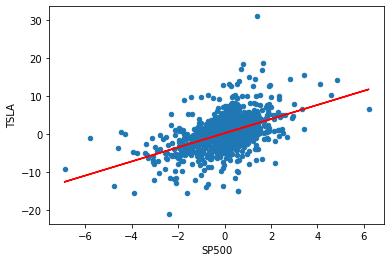

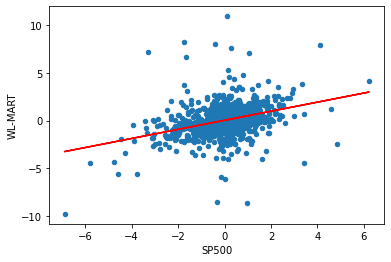

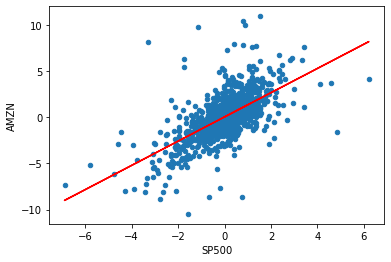

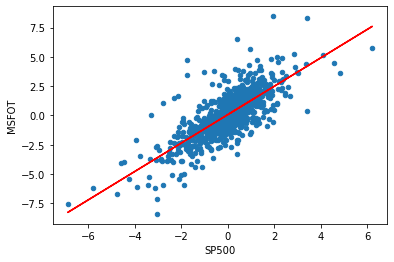

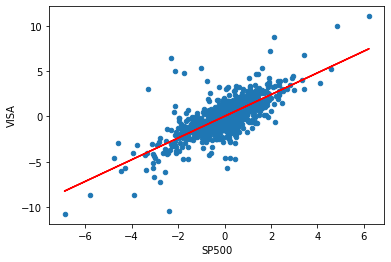

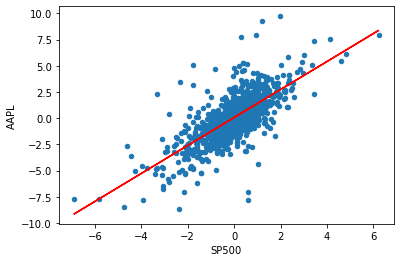

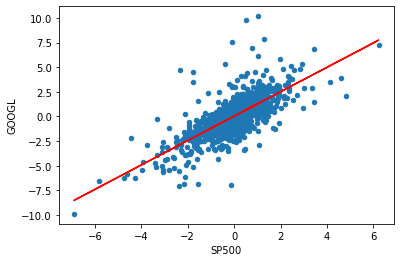

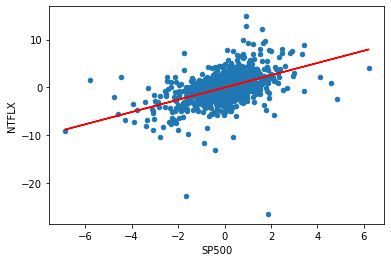

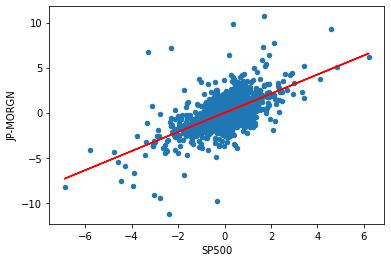

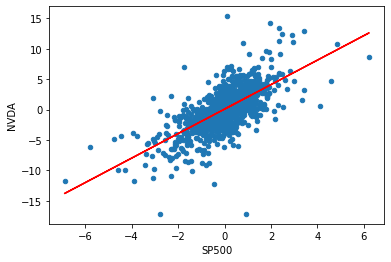

In [103]:
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'SP500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'SP500', y = i)
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['SP500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['SP500'], b * stocks_daily_return['SP500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [104]:
# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
beta

{'TSLA': 1.8627580738121607,
 'WL-MART': 0.47533475052472923,
 'AMZN': 1.3135606221009495,
 'MSFOT': 1.2104998566372658,
 'VISA': 1.2000085868786985,
 'AAPL': 1.3345059261657504,
 'GOOGL': 1.2398205180635165,
 'NTFLX': 1.280982105259814,
 'JP-MORGN': 1.060786618493931,
 'NVDA': 2.011668000162915}

In [105]:
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.
alpha

{'TSLA': 0.20507070014894227,
 'WL-MART': 0.026830623575022344,
 'AMZN': 0.04639617583673231,
 'MSFOT': 0.06549865565298135,
 'VISA': 0.01777650426582932,
 'AAPL': 0.07200029237768478,
 'GOOGL': 0.03302977247213627,
 'NTFLX': -0.0007691967257109122,
 'JP-MORGN': -0.017984575893258824,
 'NVDA': 0.07689821211887188}

In [107]:
#make a dictionary for expected returns
ER = {}
rm = stocks_daily_return['SP500'].mean() * 252 #expected return for the market
keys = list(beta.keys())
rf=0
for i in keys:
    # Calculate return for every security using CAPM  
    ER[i] = rf + ( beta[i] * (rm-rf) ) 
    
for i in keys:
    print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for TSLA is 22.03130613637953%
Expected Return Based on CAPM for WL-MART is 5.6219031087801445%
Expected Return Based on CAPM for AMZN is 15.53581036692229%
Expected Return Based on CAPM for MSFOT is 14.316884889426822%
Expected Return Based on CAPM for VISA is 14.192802015187917%
Expected Return Based on CAPM for AAPL is 15.783535722382332%
Expected Return Based on CAPM for GOOGL is 14.663667693422871%
Expected Return Based on CAPM for NTFLX is 15.150496091232494%
Expected Return Based on CAPM for JP-MORGN is 12.546188936702094%
Expected Return Based on CAPM for NVDA is 23.792501119400182%


In [108]:
# Calculate the portfolio return 
ER_portfolio = sum(list(ER.values()) * weights)
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 15.363509607983667%

